## Points per Possession Analysis  

### Overview  
This analysis calculates and explores the Points per Possession (PPP) for Partizan Mozzart Bet Belgrade players during the 2022-2023 EuroLeague season. PPP measures a player’s scoring efficiency per possession used, highlighting those who maximize points from their offensive opportunities, using points, field goal attempts (FGA), free throw attempts (FTA), and turnovers (TO). The dataset `partizan_2022_cleaned.csv` is used to:  

- Load and filter player and team data.  
- Calculate per-game PPP and identify top performers.  
- Visualize the results.  
- Validate calculations for a specific player.  
- Compare regular season and playoff performance.

In [19]:
import pandas as pd

file_path = "../data/partizan_2022_cleaned.csv"

df = pd.read_csv(file_path)

Separate player-specific data from team totals to focus the PPP analysis on individual player performance.

In [20]:
# filter 
players = df[df['player'] != 'PARTIZAN MOZZART BET BELGRADE'].copy()
team = df[df['player'] == 'PARTIZAN MOZZART BET BELGRADE'].copy()

Compute per-game PPP for each player to assess their scoring efficiency per possession used, a key indicator of offensive productivity.

### Formula  
PPP = Points / (FGA + 0.44 × FTA + TO)  

Where:  
- FGA: Field goal attempts  
- FTA: Free throw attempts  
- TO: Turnovers  

In [21]:
# points per possession (PPP)
# scoring efficiency per possession used, highlighting players who maximize points from their offensive opportunities.
# formula: PPP = Points / (FGA + 0.44 * FTA + TO)
players['field_goals_attempted'] = players['two_points_attempted'] + players['three_points_attempted']
players['possessions_used'] = players['field_goals_attempted'] + 0.44 * players['free_throws_attempted'] + players['turnovers']
players['points_per_possession'] = players['points'] / players['possessions_used']


# handle division by zero (players with no possessions used)
players['points_per_possession'] = players['points_per_possession'].fillna(0).replace([float('inf'), -float('inf')], 0)


# average PPP per player
avg_PPP = players.groupby('player')['points_per_possession'].mean().sort_values(ascending=False)


print("Top 5 Players by Points per Possession (PPP):")
print(avg_PPP.head(5))

Top 5 Players by Points per Possession (PPP):
player
Lessort Mathias    1.232044
Exum Dante         1.146356
Punter Kevin       1.126225
Smailagic Alen     1.123254
Leday Zach         1.062734
Name: points_per_possession, dtype: float64


Mathias Lessort leads with a PPP of 1.232, followed by Dante Exum at 1.146, indicating their exceptional efficiency in converting possessions into points.

Create a bar plot to visually compare the PPP of players, enhancing interpretability of the efficiency rankings.

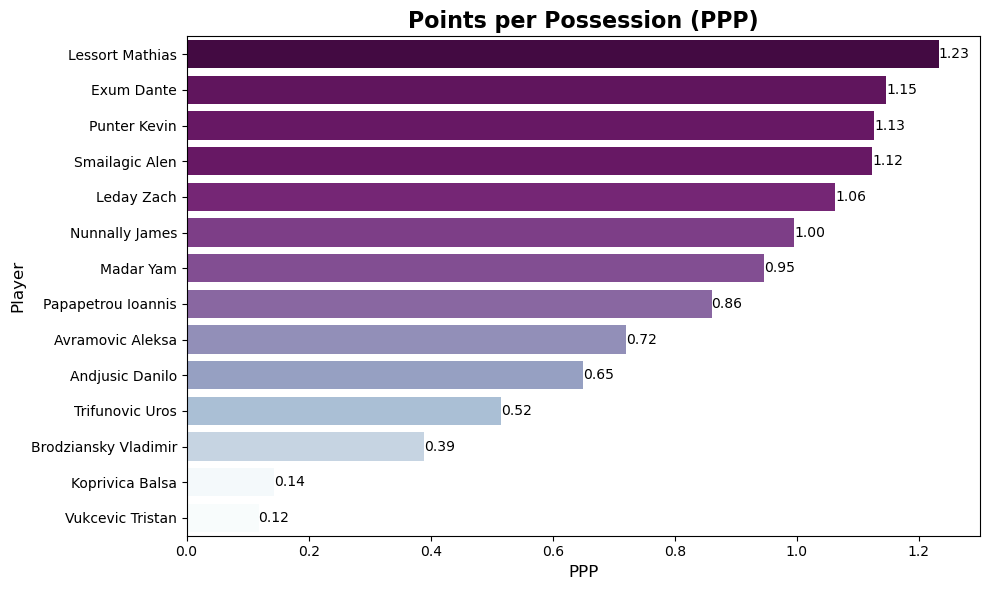

In [22]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns


top_ppp = avg_PPP.head(14)

# plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_ppp.values, y=top_ppp.index, hue=top_ppp.values, palette='BuPu', legend=False)
plt.title('Points per Possession (PPP)', fontsize=16, fontweight='bold')
plt.xlabel('PPP', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.xlim(0, 1.3)  


for i, v in enumerate(top_ppp.values):
    ax.text(v, i, f'{v:.2f}', va='center', ha='left', fontsize=10)


plt.tight_layout()
plt.show()

A horizontal bar plot is generated, displaying players by PPP. Mathias Lessort tops the chart at 1.23, followed by Dante Exum at 1.15. Each bar is annotated with its PPP value (e.g., 1.23), and the purple gradient palette improves visual clarity.

Verify the accuracy of the PPP calculation for Mathias Lessort by comparing the computed per-game average with a manual calculation based on raw stat averages.

In [23]:
# check: Validate specific player's PPP calculation
player_to_check = 'Lessort Mathias'
check_player = players[players['player'] == player_to_check]
raw_means = check_player[['points', 'field_goals_attempted', 'free_throws_attempted', 'turnovers']].mean()
computed_ppp = check_player['points_per_possession'].mean()

# manual calculation from averages
possessions_used = raw_means['field_goals_attempted'] + 0.44 * raw_means['free_throws_attempted'] + raw_means['turnovers']
manual_ppp = raw_means['points'] / possessions_used if possessions_used > 0 else 0

print(f"\nCheck for {player_to_check}:")
print(f"Computed PPP (mean of per-game values): {computed_ppp:.4f}")
print(f"Manual PPP (from averaged stats): {manual_ppp:.4f}")
print(f"Raw Averages - Points: {raw_means['points']:.2f}, FGA: {raw_means['field_goals_attempted']:.2f}, "
      f"FTA: {raw_means['free_throws_attempted']:.2f}, TO: {raw_means['turnovers']:.2f}")


Check for Lessort Mathias:
Computed PPP (mean of per-game values): 1.2320
Manual PPP (from averaged stats): 1.2196
Raw Averages - Points: 12.00, FGA: 6.37, FTA: 4.66, TO: 1.42


The computed PPP (1.2320) and manual PPP (1.2196) differ by only 0.0124, confirming the reliability of the calculation method. The slight discrepancy arises from averaging per-game PPP versus computing PPP from averaged stats.

Evaluate differences in PPP between regular season and playoffs to identify players whose scoring efficiency improves or declines in the postseason.

In [24]:
# Regular Season vs. Playoffs for PPP
# compares scoring efficiency (PPP) between phases to identify playoff performers.
regular_season = players[players['phase'] == 'REGULAR SEASON'].copy()
playoffs = players[players['phase'] == 'PLAYOFFS'].copy()

# calculate PPP for each phase
for df in [regular_season, playoffs]:
    df['field_goals_attempted'] = df['two_points_attempted'] + df['three_points_attempted']
    df['possessions_used'] = df['field_goals_attempted'] + 0.44 * df['free_throws_attempted'] + df['turnovers']
    df['points_per_possession'] = df['points'] / df['possessions_used']
    df['points_per_possession'] = df['points_per_possession'].fillna(0).replace([float('inf'), -float('inf')], 0)


reg_avg = regular_season.groupby('player')['points_per_possession'].mean()
play_avg = playoffs.groupby('player')['points_per_possession'].mean()
combined = reg_avg.to_frame('ppp_reg').join(play_avg.to_frame('ppp_play'), how='outer').fillna(0)
combined['ppp_diff'] = combined['ppp_play'] - combined['ppp_reg']


print("Top 5 Players by PPP Difference (Playoffs - Regular Season):")
print(combined.sort_values('ppp_diff', ascending=False).head(5))

Top 5 Players by PPP Difference (Playoffs - Regular Season):
                   ppp_reg  ppp_play  ppp_diff
player                                        
Trifunovic Uros   0.474683  0.784880  0.310197
Punter Kevin      1.103817  1.380179  0.276362
Madar Yam         0.918982  1.130255  0.211273
Smailagic Alen    1.096747  1.255786  0.159039
Vukcevic Tristan  0.104579  0.200000  0.095421


Uros Trifunovic exhibits the largest PPP increase (0.310), followed by Kevin Punter (0.276), highlighting their improved efficiency in the playoffs.

Validate the PPP calculation for Kevin Punter in both regular season and playoffs by comparing computed per-game averages with manual calculations from raw stat averages.

In [25]:
# check specific player's PPP in Regular Season and Playoffs
player_to_check = 'Punter Kevin'
for phase, df in [('Regular Season', regular_season), ('Playoffs', playoffs)]:
    check_player = df[df['player'] == player_to_check]
    if not check_player.empty:
        ppp_avg = check_player['points_per_possession'].mean()
        raw_means = check_player[['points', 'field_goals_attempted', 'free_throws_attempted', 'turnovers']].mean()
        manual_ppp = raw_means['points'] / (raw_means['field_goals_attempted'] + 0.44 * raw_means['free_throws_attempted'] + raw_means['turnovers']) if (raw_means['field_goals_attempted'] + 0.44 * raw_means['free_throws_attempted'] + raw_means['turnovers']) > 0 else 0
        print(f"\nCheck for {player_to_check} - {phase}:")
        print(f"Computed PPP: {ppp_avg:.4f}")
        print(f"Manual PPP: {manual_ppp:.4f}")
        print(f"Raw Averages - Points: {raw_means['points']:.2f}, FGA: {raw_means['field_goals_attempted']:.2f}, "
              f"FTA: {raw_means['free_throws_attempted']:.2f}, TO: {raw_means['turnovers']:.2f}")


Check for Punter Kevin - Regular Season:
Computed PPP: 1.1038
Manual PPP: 1.1253
Raw Averages - Points: 15.50, FGA: 10.91, FTA: 3.76, TO: 1.21

Check for Punter Kevin - Playoffs:
Computed PPP: 1.3802
Manual PPP: 1.3866
Raw Averages - Points: 22.67, FGA: 12.00, FTA: 5.33, TO: 2.00


### Validation for Kevin Punter  
- **Regular Season:** Computed PPP (1.1038) and manual PPP (1.1253) differ by 0.0215.  
- **Playoffs:** Computed PPP (1.3802) and manual PPP (1.3866) differ by 0.0064.  

These small differences validate the consistency of the PPP calculation across phases.

### Conclusion  

#### Summary of Findings  
This analysis of Points per Possession (PPP) for Partizan Mozzart Bet Belgrade players in the 2022-2023 EuroLeague season reveals:  

- **Mathias Lessort** leads with a season PPP of 1.232, followed by **Dante Exum** (1.146), **Kevin Punter** (1.126), **Alen Smailagic** (1.123), and **Zach Leday** (1.063), showcasing their ability to efficiently convert possessions into points.  
- Visualization confirms players’ scoring efficiency, with Lessort and Exum standing out.  
- Validation for Lessort (computed PPP: 1.2320, manual: 1.2196) and Punter (e.g., playoffs computed: 1.3802, manual: 1.3866) shows small differences, confirming the reliability of per-game averaging despite minor variations from averaging methods.  
- Playoff performance highlights **Uros Trifunovic** (PPP increase of 0.310) and **Punter** (0.276) as key improvers, indicating their ability to elevate efficiency in high-pressure games.  

#### Highlight on Alen Smailagic  
Notably, **Alen Smailagic** ranks in the top 5 for PPP (1.123) and consistently appears among the top performers in nearly every efficiency metric analyzed this season, such as Points per 32 Minutes (17.35, third overall) and Usage Rate. This recurring excellence draws a parallel to a Swiss Army knife in basketball—versatile, reliable, and impactful across multiple facets of the game. Despite limited minutes, Smailagic’s efficiency (e.g., 1.123 PPP, 0.159 playoff increase) suggests he could be a game-changer if given more court time, offering coaches a strategic opportunity to maximize his contributions.

#### Implications  
These insights can guide coaching decisions, such as leveraging Smailagic’s efficiency with increased minutes or relying on players like Punter in playoff scenarios.